In [103]:
# pip install folium
# pip install geopandas
# pip install pandas

In [7]:
import pandas as pd

# Carga el archivo CSV
archivo_csv = "./csv_files/puntos_muestras_suelo_digitanimal.csv" 
df = pd.read_csv(archivo_csv, sep=';')

# Mostrar las primeras filas del archivo
#print(df.head())
df

,id_digit,lat,lng
0,TZk5e,42.3900392,2.2980181
1,Xmwv5,42.1284091,2.3289972
2,D2dVf,42.1266992,2.3170783
3,rmG6b,42.3802778,2.3028943
4,sKKRT,42.1277717,2.330048
...,...,...,...
175,LR10,42.2320376,-2.8085977
176,LR11,42.2317045,-2.8084502
177,LR13,42.2108464,-2.783807
178,LR14,42.210563,-2.784346


In [8]:
import json

# Abre el archivo JSON y lo carga en un diccionario de Python
with open('./json_files_farms/3_23.json', 'r') as archivo:
    datos = json.load(archivo)

# Muestra los datos cargados
print(datos)


{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-2.795076, 42.300992], [-2.799368, 42.301182], [-2.802114, 42.300992], [-2.80426, 42.301944], [-2.803745, 42.303912], [-2.805376, 42.30569], [-2.811642, 42.308482], [-2.816362, 42.307975], [-2.821684, 42.308546], [-2.826233, 42.309181], [-2.833014, 42.309244], [-2.836962, 42.30753], [-2.838421, 42.305563], [-2.843056, 42.303277], [-2.844429, 42.300357], [-2.841253, 42.295405], [-2.834902, 42.292167], [-2.830524, 42.289755], [-2.824345, 42.288231], [-2.820826, 42.283088], [-2.817049, 42.281881], [-2.81044, 42.280674], [-2.804089, 42.284485], [-2.796021, 42.290707], [-2.793188, 42.295723], [-2.793188, 42.300484], [-2.795076, 42.300992]]]}}


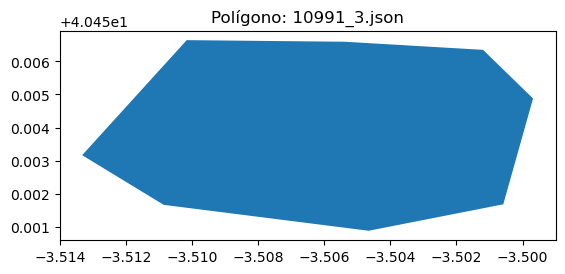

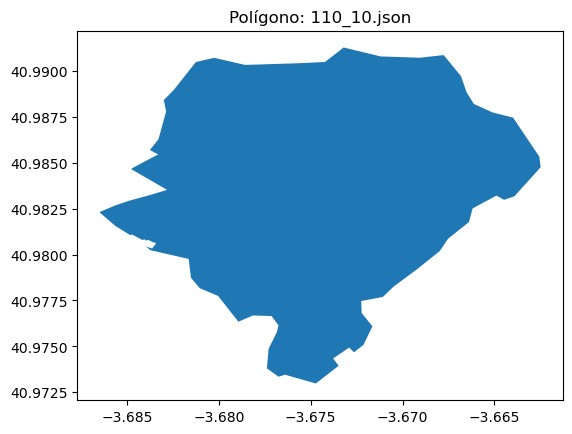

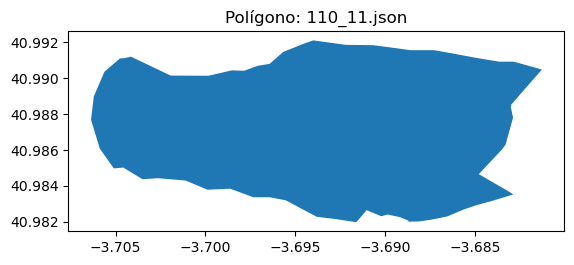

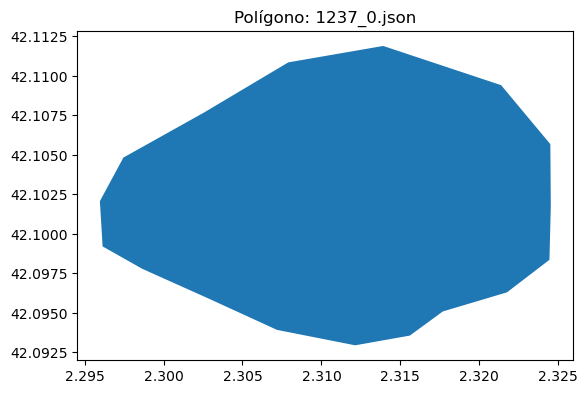

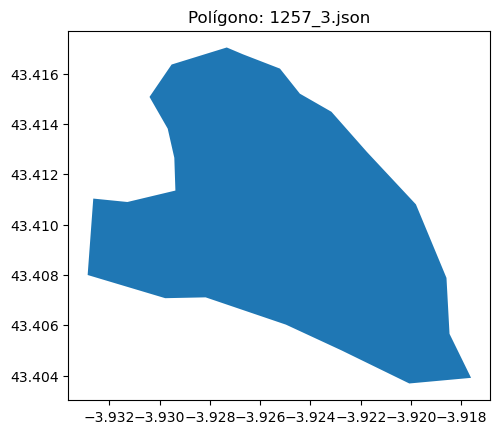

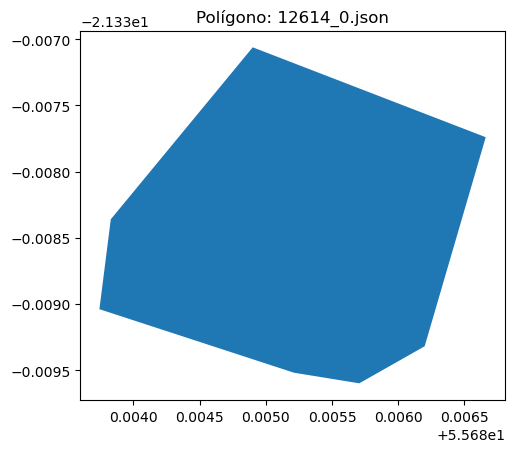

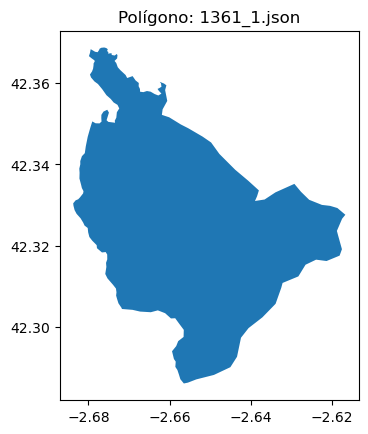

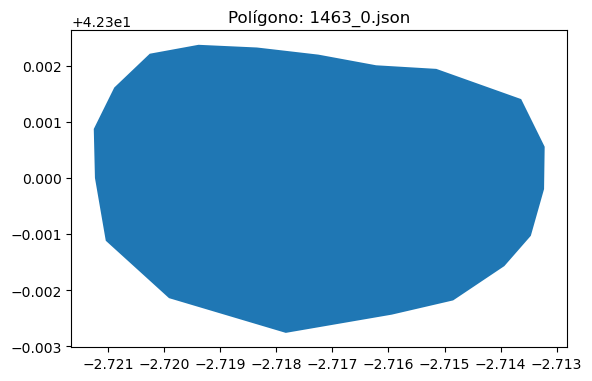

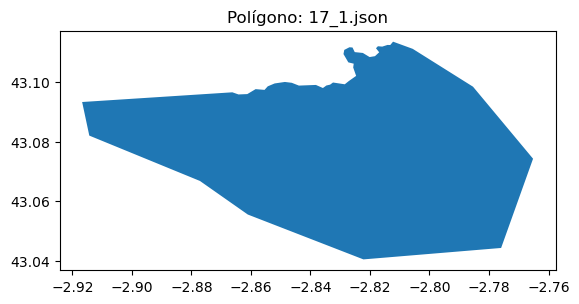

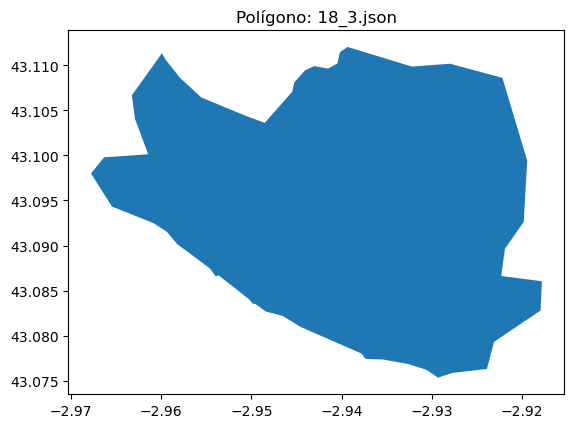

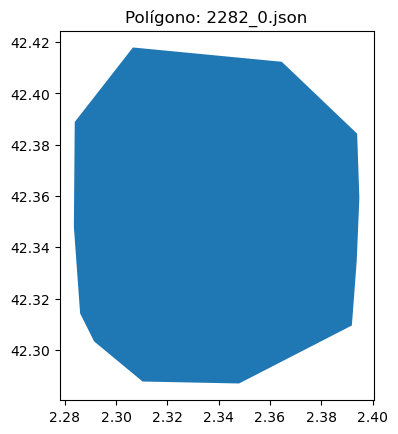

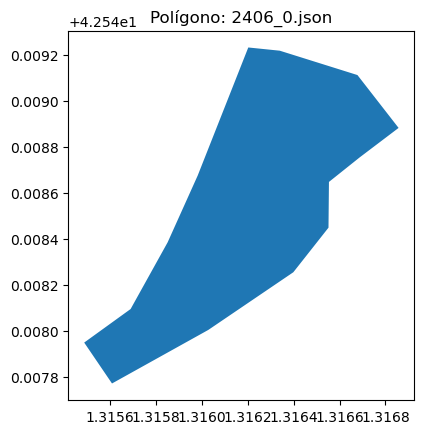

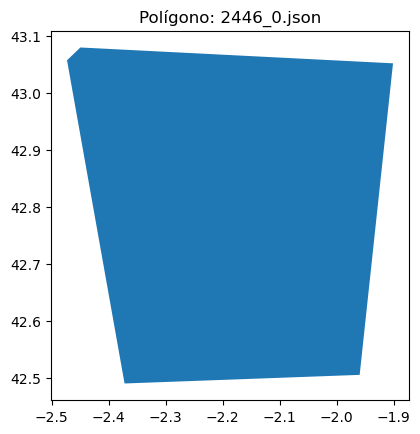

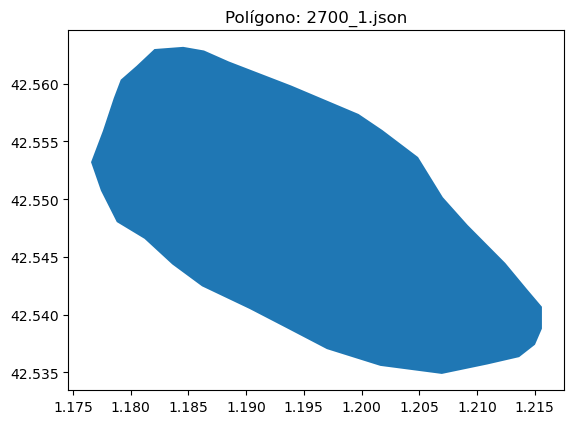

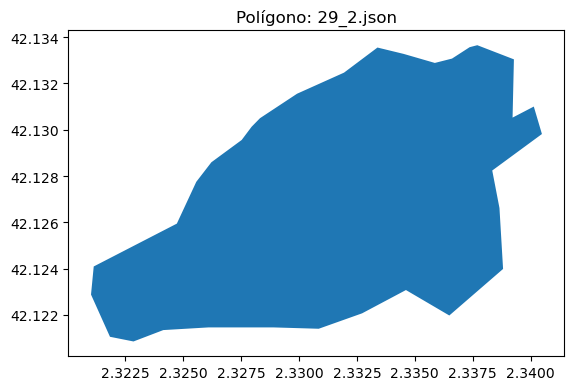

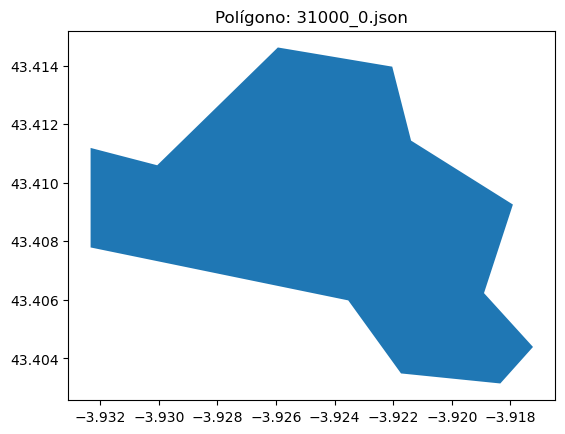

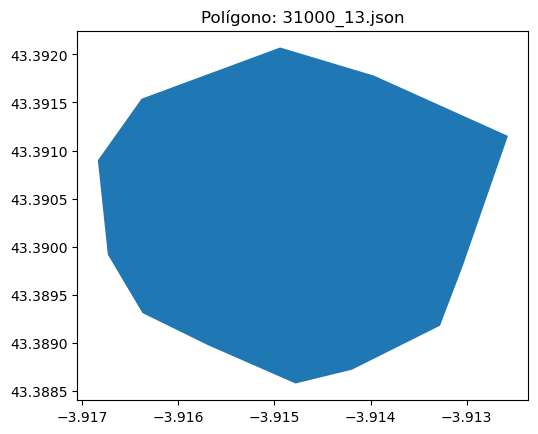

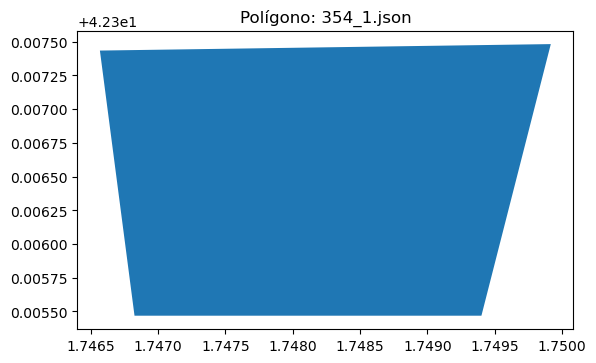

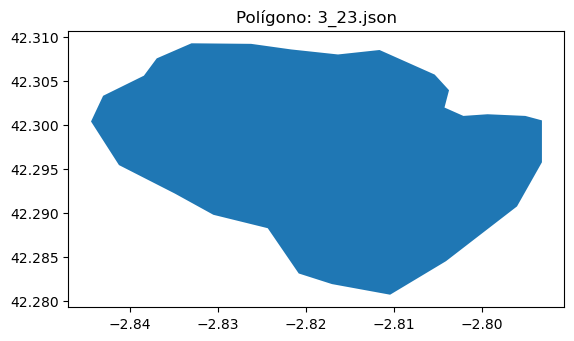

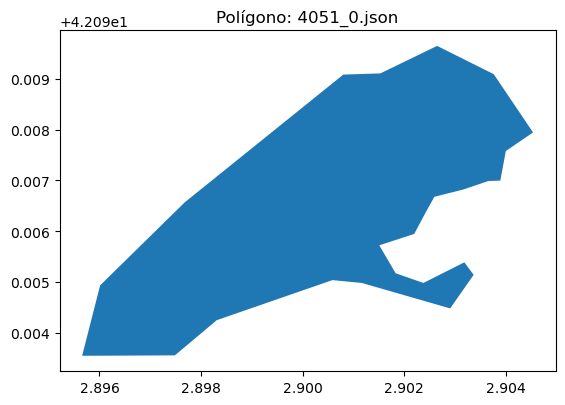

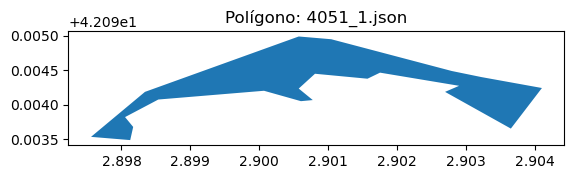

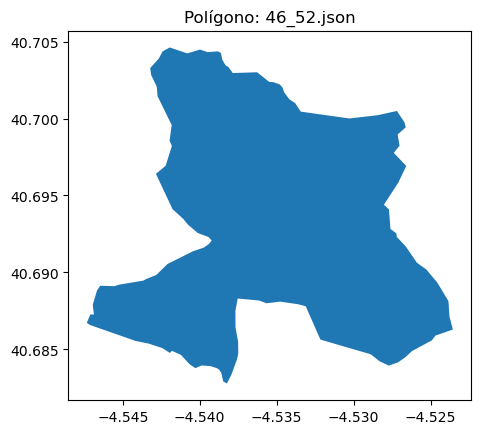

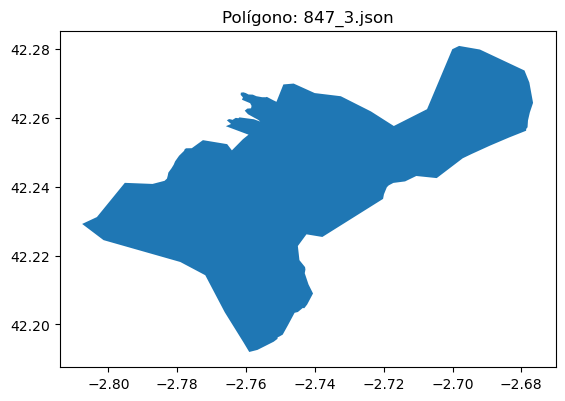

In [15]:
import os
import json
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Ruta a la carpeta con los archivos JSON
ruta_carpeta = './json_files_farms'

# Lista para almacenar las geometrías y nombres de los archivos
geometrias = []
nombres_archivos = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.json'):  # Verificar que el archivo tenga extensión .json
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        # Leer y procesar el archivo JSON
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            # Obtener la geometría y convertirla a un objeto Shapely
            geometria = shape(datos['geometry'])
            geometrias.append(geometria)
            nombres_archivos.append(archivo)

# Graficar cada polígono individualmente
for i, geometria in enumerate(geometrias):
    # Crear un GeoDataFrame para el polígono individual
    gdf = gpd.GeoDataFrame({'geometry': [geometria]})
    
    # Crear la gráfica
    gdf.plot()
    plt.title(f'Polígono: {nombres_archivos[i]}')
    plt.show()


In [38]:
import os
import json
import geopandas as gpd
from shapely.geometry import shape
import folium
from matplotlib import cm
import random

# Ruta a la carpeta con los archivos JSON
ruta_carpeta = './json_files_farms'

# Ruta al shapefile del mapa político de España
ruta_shapefile = './shp_files/ll_autonomicas_inspire_peninbal_etrs89.shp'

# Cargar el mapa político de España
mapa_espana = gpd.read_file(ruta_shapefile)
print(f"CRS del mapa político antes de la transformación: {mapa_espana.crs}")

# Definir CRS si no está presente
if mapa_espana.crs is None:
    mapa_espana = mapa_espana.set_crs("EPSG:25830")  # Establecer CRS inicial (ajústalo según corresponda)

# Transformar el CRS al requerido por Folium
mapa_espana = mapa_espana.to_crs("EPSG:4326")
print(f"CRS del mapa político después de la transformación: {mapa_espana.crs}")

# Crear un mapa centrado en España
mapa = folium.Map(location=[40, -3], zoom_start=6)

# Añadir el mapa político de España como GeoJson
folium.GeoJson(data=mapa_espana, name="Mapa político de España").add_to(mapa)

# Generar una lista de colores únicos para los polígonos
color_palette = cm.get_cmap('tab10', 10)  # Paleta de colores con 10 colores
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(os.listdir(ruta_carpeta)))]

# Iterar sobre todos los archivos en la carpeta
for idx, archivo in enumerate(os.listdir(ruta_carpeta)):
    if archivo.endswith('.json'):  # Verificar que el archivo tenga extensión .json
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        # Leer y procesar el archivo JSON
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            # Obtener la geometría y convertirla a un objeto Shapely
            geometria = shape(datos['geometry'])
            # Añadir la geometría al mapa con un color y un popup para el nombre del archivo
            folium.GeoJson(
                data=geometria,
                style_function=lambda x, color=colors[idx]: {
                    'fillColor': color,
                    'color': color,
                    'weight': 2,
                    'fillOpacity': 0.5,
                },
                tooltip=archivo  # Mostrar el nombre del archivo al pasar el cursor
            ).add_to(mapa)

# Guardar y mostrar el mapa interactivo
mapa.save("mapa_interactivo_colores.html")
print("Mapa interactivo guardado como 'mapa_interactivo_colores.html'. Ábrelo en tu navegador.")

CRS del mapa político antes de la transformación: None
CRS del mapa político después de la transformación: EPSG:4326


C:\Users\Erika Zuluaga\AppData\Local\Temp\ipykernel_15524\680984467.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = cm.get_cmap('tab10', 10)  # Paleta de colores con 10 colores


Mapa interactivo guardado como 'mapa_interactivo_colores.html'. Ábrelo en tu navegador.


In [104]:
import os
import json
import pandas as pd
from shapely.geometry import Point, shape

# Ruta a la carpeta con los archivos JSON
ruta_carpeta = './json_files_farms'

# Ruta al archivo CSV
ruta_csv = './csv_files/puntos_muestras_suelo_digitanimal.csv'

# Leer el archivo CSV (asumiendo que el separador es ';')
df = pd.read_csv(ruta_csv, sep=';')

# Reemplazar valores no numéricos como '#N/D' con NaN y convertir a float
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

# Eliminar filas con valores no válidos en lat o lng
df = df.dropna(subset=['lat', 'lng'])

# Crear la nueva columna "coordenada" en formato [lng, lat] sin modificar los valores originales
df['coordenada'] = df.apply(lambda row: [row['lng'], row['lat']], axis=1)

# Lista para almacenar los polígonos y nombres de los archivos JSON
poligonos = []
nombres_archivos = []

# Iterar sobre todos los archivos JSON en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.json'):  # Verificar que el archivo tenga extensión .json
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            geometria = shape(datos['geometry'])  # Convertir la geometría en un objeto Shapely
            poligonos.append(geometria)
            nombres_archivos.append(archivo)

# Función para verificar si una coordenada pertenece a un polígono
#def verificar_coordenada(row):
#    punto = Point(row['coordenada'])  # Crear un punto Shapely con la coordenada
#    for idx, poligono in enumerate(poligonos):
#        if poligono.contains(punto):  # Verificar si el punto está dentro del polígono
#            return nombres_archivos[idx]  # Devolver el nombre del archivo JSON
#    return None  # Si no pertenece a ningún polígono, devolver None

# Función para verificar si una coordenada pertenece a un polígono (incluyendo bordes)
def verificar_coordenada(row):
    punto = Point(row['coordenada'])  # Crear un punto Shapely con la coordenada
    for idx, poligono in enumerate(poligonos):
        if poligono.intersects(punto):  # Verificar si el punto está dentro o en el borde del polígono
            return nombres_archivos[idx]  # Devolver el nombre del archivo JSON
    return None  # Si no pertenece a ningún polígono, devolver None


# Aplicar la función a cada fila del DataFrame
df['archivo_json'] = df.apply(verificar_coordenada, axis=1)

# Guardar el resultado en un nuevo archivo CSV
df.to_csv('resultado_coordenadas.csv', index=False)
print("Archivo generado: 'resultado_coordenadas.csv'")

# Filtrar y mostrar las filas donde 'archivo_json' no es None
df_resultados = df[df['archivo_json'].notna()]
print("Coordenadas que pertenecen a un polígono:")
print(df_resultados)


Archivo generado: 'resultado_coordenadas.csv'
Coordenadas que pertenecen a un polígono:
    id_digit        lat       lng                coordenada archivo_json
0      TZk5e  42.390039  2.298018   [2.2980181, 42.3900392]  2282_0.json
1      Xmwv5  42.128409  2.328997   [2.3289972, 42.1284091]    29_2.json
3      rmG6b  42.380278  2.302894   [2.3028943, 42.3802778]  2282_0.json
4      sKKRT  42.127772  2.330048    [2.330048, 42.1277717]    29_2.json
11     4WMEQ  42.129148  2.328069   [2.3280687, 42.1291478]    29_2.json
..       ...        ...       ...                       ...          ...
163      LR8  42.288540 -2.811640      [-2.81164, 42.28854]    3_23.json
164      LR9  42.296661 -2.797937  [-2.7979369, 42.2966605]    3_23.json
169      LR3  42.290067 -2.658373  [-2.6583732, 42.2900667]  1361_1.json
173      LR7  42.288952 -2.811498   [-2.811498, 42.2889519]    3_23.json
174      LR8  42.288540 -2.811640      [-2.81164, 42.28854]    3_23.json

[81 rows x 5 columns]


In [109]:
# Ruta a la carpeta con los archivos JSON
ruta_carpeta = './json_files_farms'

# Ruta al archivo CSV
ruta_csv = './resultado_coordenadas.csv'

# Ruta al shapefile del mapa político de España
ruta_shapefile = './shp_files/ll_autonomicas_inspire_peninbal_etrs89.shp'

# Cargar el mapa político de España
mapa_espana = gpd.read_file(ruta_shapefile)
print(f"CRS del mapa político antes de la transformación: {mapa_espana.crs}")

# Definir CRS si no está presente
if mapa_espana.crs is None:
    mapa_espana = mapa_espana.set_crs("EPSG:25830")  # Establecer CRS inicial (ajústalo según corresponda)

# Transformar el CRS al requerido por Folium
mapa_espana = mapa_espana.to_crs("EPSG:4326")
print(f"CRS del mapa político después de la transformación: {mapa_espana.crs}")

# Crear un mapa centrado en España
mapa = folium.Map(location=[40, -3], zoom_start=6)

# Añadir el mapa político de España como GeoJson
folium.GeoJson(data=mapa_espana, name="Mapa político de España").add_to(mapa)

# Generar una lista de colores únicos para los polígonos
color_palette = cm.get_cmap('tab10', 10)  # Paleta de colores con 10 colores
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(os.listdir(ruta_carpeta)))]

# Lista para almacenar los polígonos y nombres de los archivos JSON
poligonos = []
nombres_archivos = []

# Iterar sobre todos los archivos en la carpeta
for idx, archivo in enumerate(os.listdir(ruta_carpeta)):
    if archivo.endswith('.json'):  # Verificar que el archivo tenga extensión .json
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            geometria = shape(datos['geometry'])  # Convertir la geometría en un objeto Shapely
            poligonos.append(geometria)
            nombres_archivos.append(archivo)
            # Añadir la geometría al mapa con un color y un popup para el nombre del archivo
            folium.GeoJson(
                data=geometria,
                style_function=lambda x, color=colors[idx]: {
                    'fillColor': color,
                    'color': color,
                    'weight': 2,
                    'fillOpacity': 0.5,
                },
                tooltip=archivo  # Mostrar el nombre del archivo al pasar el cursor
            ).add_to(mapa)

# Cargar el archivo CSV con las coordenadas
df = pd.read_csv(ruta_csv)

# Asegurar que la columna 'coordenada' contiene listas en formato [lng, lat]
def parse_coordenada(coord):
    try:
        # Convertir el texto a una lista de floats si es necesario
        return [float(x) for x in coord.strip("[]").split(",")]
    except Exception as e:
        print(f"Error al procesar coordenada: {coord} - {e}")
        return None  # Devuelve None si no es válida

# Aplicar el ajuste a la columna 'coordenada'
df['coordenada'] = df['coordenada'].apply(parse_coordenada)

# Eliminar filas con coordenadas inválidas
df = df.dropna(subset=['coordenada'])

# Función para categorizar los puntos
def categorizar_punto(row):
    punto = Point(row['coordenada'])  # Crear un punto Shapely con la coordenada
    for poligono in poligonos:
        if poligono.contains(punto):  # Dentro del polígono
            return 'green'
        elif poligono.touches(punto):  # En el límite del polígono
            return 'yellow'
    return 'red'  # Fuera del polígono

# Crear la columna de color
df['color'] = df.apply(categorizar_punto, axis=1)

# Añadir los puntos al mapa con su color y nombre
for _, row in df.iterrows():
    color = row['color']
    popup_text = f"ID: {row['id_digit']}<br>Coordenada: {row['coordenada']}<br>Estado: {'Dentro' if color == 'green' else 'Límite' if color == 'yellow' else 'Fuera'}"
    folium.CircleMarker(
        location=[row['coordenada'][1], row['coordenada'][0]],  # lat, lng
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=300),
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_puntos_coloreados.html")
print("Mapa interactivo guardado como 'mapa_puntos_coloreados.html'. Ábrelo en tu navegador.")


CRS del mapa político antes de la transformación: None
CRS del mapa político después de la transformación: EPSG:4326


C:\Users\Erika Zuluaga\AppData\Local\Temp\ipykernel_15524\4246703657.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = cm.get_cmap('tab10', 10)  # Paleta de colores con 10 colores


Mapa interactivo guardado como 'mapa_puntos_coloreados.html'. Ábrelo en tu navegador.


In [ ]:
import os
import json
import pandas as pd
from shapely.geometry import shape, Point
import geopandas as gpd
import folium
from matplotlib import cm
import random

# Ruta a la carpeta con los archivos JSON
ruta_carpeta = './json_files_farms'

# Ruta al archivo CSV
ruta_csv = './resultado_coordenadas.csv'

# Leer el archivo CSV
df = pd.read_csv(ruta_csv)

# Asegurar que la columna 'coordenada' contiene listas en formato [lng, lat]
def parse_coordenada(coord):
    try:
        return [float(x) for x in coord.strip("[]").split(",")]
    except Exception as e:
        print(f"Error al procesar coordenada: {coord} - {e}")
        return None

df['coordenada'] = df['coordenada'].apply(parse_coordenada)
df = df.dropna(subset=['coordenada'])  # Eliminar coordenadas inválidas

# Crear un GeoDataFrame para los puntos
gdf_puntos = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['coordenada'].apply(lambda x: x[0]), df['coordenada'].apply(lambda x: x[1])),
    crs="EPSG:4326"
)

# Convertir puntos a CRS métrico
gdf_puntos = gdf_puntos.to_crs("EPSG:25830")

# Lista para almacenar los polígonos, buffers y nombres de archivos
poligonos = []
buffers_100 = []
nombres_archivos = []

# Crear un mapa centrado en España
mapa = folium.Map(location=[40, -3], zoom_start=6)

# Generar colores únicos para cada polígono
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(os.listdir(ruta_carpeta)))]

# Iterar sobre todos los archivos JSON
for idx, archivo in enumerate(os.listdir(ruta_carpeta)):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            geometria = shape(datos['geometry'])  # Convertir geometría a Shapely
            gdf = gpd.GeoDataFrame({'geometry': [geometria]}, crs="EPSG:4326")
            
            # Convertir a CRS proyectado (para usar metros)
            gdf = gdf.to_crs("EPSG:25830")
            
            # Crear un buffer de 100 metros
            buffer_100 = gdf.buffer(100).iloc[0]
            
            # Guardar el polígono original y su buffer
            poligonos.append(gdf.iloc[0].geometry)
            buffers_100.append(buffer_100)
            nombres_archivos.append(archivo)

            # Añadir el polígono original al mapa (convertido a EPSG:4326)
            folium.GeoJson(
                data=gdf.to_crs("EPSG:4326").geometry.iloc[0],
                style_function=lambda x, color=colors[idx]: {
                    'fillColor': color,
                    'color': color,
                    'weight': 2,
                    'fillOpacity': 0.5,
                },
                tooltip=f"Polígono: {archivo}"
            ).add_to(mapa)

            # Convertir el buffer a un GeoDataFrame para cambiar el CRS
            gdf_buffer = gpd.GeoDataFrame({'geometry': [buffer_100]}, crs="EPSG:25830")
            gdf_buffer = gdf_buffer.to_crs("EPSG:4326")

            # Añadir el buffer al mapa
            folium.GeoJson(
                data=gdf_buffer.geometry.iloc[0],
                style_function=lambda x, color=colors[idx]: {
                    'fillColor': color,
                    'color': color,
                    'weight': 1,
                    'fillOpacity': 0.2,
                },
                tooltip=f"Buffer 100m: {archivo}"
            ).add_to(mapa)

# Clasificar puntos y calcular distancia al polígono más cercano
def categorizar_punto_y_calcular_distancia(row):
    punto = row['geometry']
    min_dist = float('inf')
    poligono_cercano = None
    estado = 'Fuera'

    for idx, poligono in enumerate(poligonos):
        if poligono.contains(punto):
            return 'green', 'Dentro', 0, nombres_archivos[idx]
        elif buffers_100[idx].contains(punto):
            return 'blue', 'Dentro_buffer', 0, nombres_archivos[idx]
        
        # Calcular distancia al polígono
        dist = punto.distance(poligono)
        if dist < min_dist:
            min_dist = dist
            poligono_cercano = nombres_archivos[idx]
    
    # Si el punto está a más de 500 metros, clasificar como no_poligono
    if min_dist > 500:
        return 'black', 'No_poligono', min_dist, poligono_cercano
    
    return 'red', 'Fuera', min_dist, poligono_cercano

gdf_puntos[['color', 'estado', 'distancia_metros', 'poligono_cercano']] = gdf_puntos.apply(
    categorizar_punto_y_calcular_distancia, axis=1, result_type="expand"
)

# Convertir puntos de vuelta a EPSG:4326 para visualización
gdf_puntos = gdf_puntos.to_crs("EPSG:4326")

# Añadir los puntos al mapa
for _, row in gdf_puntos.iterrows():
    color = row['color']
    popup_text = f"ID: {row['id_digit']}<br>Coordenada: {row['coordenada']}<br>Estado: {row['estado']}<br>Distancia: {row['distancia_metros']:.2f} m<br>Polígono cercano: {row['poligono_cercano'] or 'Ninguno'}"
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],  # lat, lng
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=300),
    ).add_to(mapa)

# Guardar el mapa
mapa.save("mapa_puntos_distancias.html")
print("Mapa interactivo guardado como 'mapa_puntos_distancias.html'.")

# Renombrar la columna
gdf_puntos = gdf_puntos.rename(columns={"archivo_json": "nombre_poligono"})

# Guardar la información actualizada en un archivo Excel
gdf_puntos.drop(columns='geometry').to_excel("puntos_actualizados.xlsx", index=False)
print("Archivo Excel guardado como 'puntos_actualizados.xlsx'.")


Mapa interactivo guardado como 'mapa_puntos_distancias.html'.
Archivo Excel guardado como 'puntos_actualizados.xlsx'.


# NUEVOS POLIGONOS

In [1]:
import os
import json
import pandas as pd
from shapely.geometry import shape, Point
import geopandas as gpd
import folium
from matplotlib import cm
import random

# Ruta a las carpetas
ruta_carpeta = './json_files_farms'
ruta_carpeta_nuevos = './json_poligonos_nuevos_filtrados'

# Ruta al archivo CSV
ruta_csv = './resultado_coordenadas.csv'

# Leer el archivo CSV
df = pd.read_csv(ruta_csv)

# Asegurar que la columna 'coordenada' contiene listas en formato [lng, lat]
def parse_coordenada(coord):
    try:
        return [float(x) for x in coord.strip("[]").split(",")]
    except Exception as e:
        print(f"Error al procesar coordenada: {coord} - {e}")
        return None

df['coordenada'] = df['coordenada'].apply(parse_coordenada)
df = df.dropna(subset=['coordenada'])  # Eliminar coordenadas inválidas

# Crear un GeoDataFrame para los puntos
gdf_puntos = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['coordenada'].apply(lambda x: x[0]), df['coordenada'].apply(lambda x: x[1])),
    crs="EPSG:4326"
)

# Convertir puntos a CRS métrico
gdf_puntos = gdf_puntos.to_crs("EPSG:25830")

# Procesar los polígonos originales
poligonos = []
buffers_100 = []
nombres_archivos = []

for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            geometria = shape(datos['geometry'])  # Convertir geometría a Shapely
            gdf = gpd.GeoDataFrame({'geometry': [geometria]}, crs="EPSG:4326")

            # Convertir a CRS proyectado
            gdf = gdf.to_crs("EPSG:25830")

            # Crear un buffer de 100 metros
            buffer_100 = gdf.buffer(100).iloc[0]

            # Guardar el polígono y su buffer
            poligonos.append(gdf.iloc[0].geometry)
            buffers_100.append(buffer_100)
            nombres_archivos.append(archivo)

# Clasificar puntos y calcular distancia al polígono más cercano (original)
def categorizar_punto(row):
    punto = row['geometry']
    min_dist = float('inf')
    poligono_cercano = None
    estado = 'Fuera'

    for idx, poligono in enumerate(poligonos):
        if poligono.contains(punto):
            return 'green', 'Dentro', 0, nombres_archivos[idx]
        elif buffers_100[idx].contains(punto):
            return 'blue', 'Dentro_buffer', 0, nombres_archivos[idx]

        # Calcular distancia al polígono
        dist = punto.distance(poligono)
        if dist < min_dist:
            min_dist = dist
            poligono_cercano = nombres_archivos[idx]

    if min_dist > 500:
        return 'black', 'No_poligono', min_dist, poligono_cercano

    return 'red', 'Fuera', min_dist, poligono_cercano

gdf_puntos[['color', 'estado', 'distancia_metros', 'nombre_poligono']] = gdf_puntos.apply(
    categorizar_punto, axis=1, result_type="expand"
)

# Filtrar puntos con estado 'No_poligono'
puntos_no_poligono = gdf_puntos[gdf_puntos['estado'] == 'No_poligono']

# Procesar los nuevos polígonos
poligonos_nuevos = []
buffers_nuevos_100 = []
nombres_archivos_nuevos = []

for archivo in os.listdir(ruta_carpeta_nuevos):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(ruta_carpeta_nuevos, archivo)
        with open(ruta_archivo, 'r') as f:
            datos = json.load(f)
            geometria = shape(datos['geometry'])
            gdf = gpd.GeoDataFrame({'geometry': [geometria]}, crs="EPSG:4326")

            # Convertir a CRS proyectado
            gdf = gdf.to_crs("EPSG:25830")

            # Crear un buffer de 100 metros
            buffer_100 = gdf.buffer(100).iloc[0]

            # Guardar el polígono y su buffer
            poligonos_nuevos.append(gdf.iloc[0].geometry)
            buffers_nuevos_100.append(buffer_100)
            nombres_archivos_nuevos.append(archivo)

# Clasificar puntos con los nuevos polígonos
def categorizar_punto_nuevo(row):
    punto = row['geometry']
    min_dist = float('inf')
    poligono_cercano = None

    for idx, poligono in enumerate(poligonos_nuevos):
        if poligono.contains(punto):
            return 'green', 'Dentro', 0, nombres_archivos_nuevos[idx]
        elif buffers_nuevos_100[idx].contains(punto):
            return 'blue', 'Dentro_buffer', 0, nombres_archivos_nuevos[idx]

        # Calcular distancia al polígono
        dist = punto.distance(poligono)
        if dist < min_dist:
            min_dist = dist
            poligono_cercano = nombres_archivos_nuevos[idx]

    return 'red', 'Fuera', min_dist, poligono_cercano

puntos_no_poligono[['color_nuevo', 'estado_nuevo', 'distancia_metros_nueva', 'nombre_poligono_nuevo']] = puntos_no_poligono.apply(
    categorizar_punto_nuevo, axis=1, result_type="expand"
)

# Combinar los resultados con el GeoDataFrame original
gdf_puntos = gdf_puntos.merge(
    puntos_no_poligono[['color_nuevo', 'estado_nuevo', 'distancia_metros_nueva', 'nombre_poligono_nuevo']],
    left_index=True, right_index=True, how='left'
)

# Guardar el resultado en un nuevo archivo Excel
gdf_puntos.drop(columns='geometry').to_excel("puntos_actualizados_con_nuevos.xlsx", index=False)
print("Archivo Excel actualizado guardado como 'puntos_actualizados_con_nuevos.xlsx'.")


c:\Users\Erika Zuluaga\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Erika Zuluaga\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Erika Zuluaga\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Archivo Excel actualizado guardado como 'puntos_actualizados_con_nuevos.xlsx'.
